In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Import dataset
data = pd.read_csv('Train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


- Dari dataset diatas memiliki 8068 baris dan 11 kolom yang terdiri dari 4 kolom numerik dan 7 kolo, kategorikal

In [4]:
# Melihat 5 bari awal pada dataset
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
# Melihat statistik dalam dataset
data.describe() 

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


# Hasil statistik Age 
- mean (rata-rata) dalam kategori age 43.46, yang berarti rata - rata usia pelanggan adalah sekitar 43 tahun.
- std (standar deviasi) 16.71, menunjukan variasi usia cukup besar dengan banyak pelanggan berada jauh dari rata - rata.
- min (usia ternuda) berada pada usia 18 tahun dan max (usia tertua) berada pada usia 89 tahun.
# Hasil statistik Work_Experience
- mean (rata-rata) dalam kategori work experience terdapat rata-rata pengalaman kerja 2.64 tahun.
- std (standar deviasi) 3.40, menunjukan variasi pengalaman kerja cukup besar.
- min (nilai terkecil) berada pada 0 yang menunjukan terdapat pelanggan yang tidak memiliki pengalaman kerja dan max (nilai terbesar) ada pada angka 14, yang menunjukan pengalaman kerja paling lama adalah 14 tahun.
# Hasil statistik Family_Size
- mean (rata-rata) 2.85, rata - rata ukuran keluarga adalah 2-3 orang.
- std (standar deviasi) 1.53, Variasi ukuran keluarga cukup tinggi.
- min (nilai terkecil) 1, menunjukan terdapat pelanggan yang hidup sendiri dan max (nilai tertinggi) 9, menunjukan paling besar memiliki 9 anggota keluarga.

In [6]:
# Melakukan check missing values pada dataset
data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

# Hasil cek missing values 
Terdapat beberapa kategori yang memiliki missing vvalues dengan detai sebagai berikut :
- Ever_Married 140
- Graduated 78
- Profession 124
- Work_Experience 829
- Family_Size 335
- Var_1 76

sehingga perlu dilakukan penanganan missing values pada kategori tersebut.

In [7]:
# Melakukan handling missing values
data = data.assign(
    Ever_Married=data['Ever_Married'].fillna(data['Ever_Married'].mode()[0]),
    Graduated=data['Graduated'].fillna(data['Graduated'].mode()[0]),
    Profession=data['Profession'].fillna(data['Profession'].mode()[0]),
    Work_Experience=data['Work_Experience'].fillna(data['Work_Experience'].median()),
    Family_Size=data['Family_Size'].fillna(data['Family_Size'].median()),
    Var_1=data['Var_1'].fillna(data['Var_1'].mode()[0])
)

In [11]:
data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [13]:
# Menghapus kolom ID karena tidak diperlukan
if 'ID' in data.columns:
    data = data.drop(columns=['ID'])

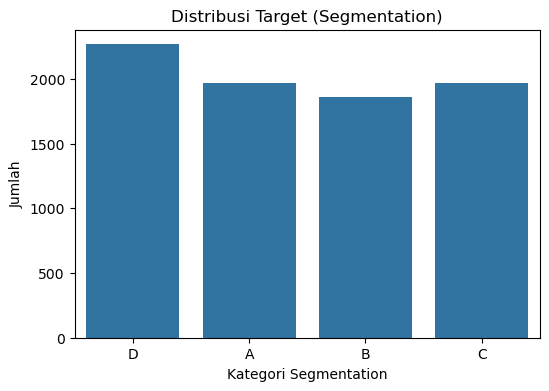

In [16]:
# melakukan visualisasi Distribusi Target (Segmentation)
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Segmentation'])
plt.title('Distribusi Target (Segmentation)')
plt.xlabel('Kategori Segmentation')
plt.ylabel('Jumlah')
plt.show()

# Hasil Distribusi Target (Segmentation)
Distribusi cukup seimbang, tidak ada kelas yang tertalu dominan atau terlalu sedikit.
Kelas D memiliki jumlah terbanyak, selisih antara kelas tidak terlalu besar.

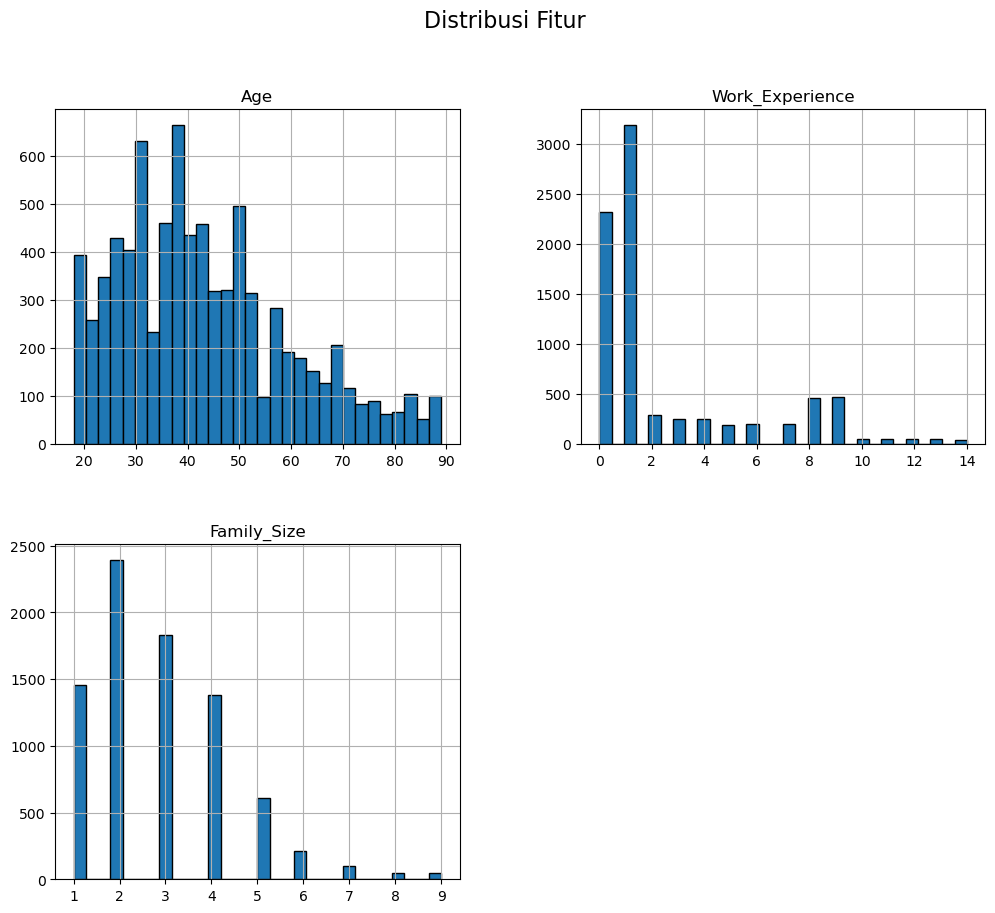

In [14]:
# Distribusi fitur numerik
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Distribusi Fitur', fontsize=16)
plt.show()

# Pada histogram Age (Usia)
- Distribusi usia terlihat cukup bervariasi dengan puncak frekuensi pada usia sekitar 30 hingga 50 tahun.
- Pola distribusi menunjukan bahwa rata-rata individu berada dalam rentang usia produktif.
# Pada histogram Work_Experience
- Distribusi pengalaman kerja menunjukan bahwa rata-rata individu memiliki pengalaman 0-2 tahun.
- Ada sedikit individu dengan pengalaman lebih lama (>5 tahun), tetapi jumlahnya berkurang drastis.
- Hal ini bisa menunjukan bahwa banyak individu dalam dataset adalah pekerja baru atau sedang dalam tahap awal karier mereka.
# Pada histogram Family_Size
- Sebagian besar individu memiliki 1-4 anggota keluarga.
- Terdapat keluarga dengan lebih dari 5 anggota memiliki frekuensi yang jauh lebih rendah.

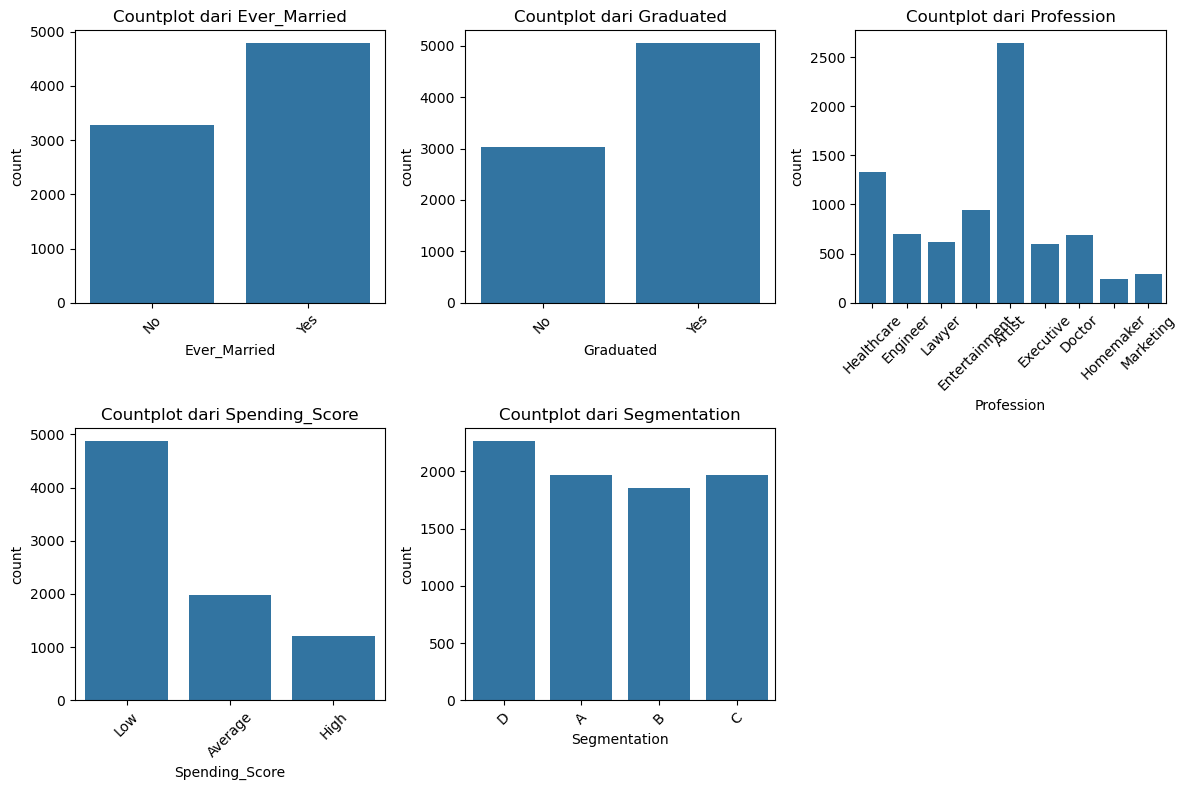

In [19]:
# Countplot untuk fitur kategori
categorical_features = ['Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Segmentation']
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=data[col])
    plt.title(f'Countplot dari {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analisa visualisasi distribusi segmentation
- Gender mungkin bukan faktor utama dalam menentukan segmentasi, tetapi tetap memiliki pengaruh. Rata - rata didominasi oleh laki-laki (Male) dibandingkan perempuan (Female).
- Status pernikahan dapat menjadi faktor dalam segmentasi mungkin karena berhubungan dengan pola konsumsi atau tingkat pengeluaran. Terlihat pada grafik orang yang sudah menikah lebih dominan dalam kategori segmentasi dibandingkan yang belum menikah.
- Pendidikan dapat menjadi faktor dalam menentukan segmentasi, karena mempengaruhi prefensi belanja dan gaya hidup. Dimana pada grafik terlihat Yes (orang yang lulus kuliah) lebih banyak tersebar dalam berbagai segmentasi dibandingkan dengan yang tidak lulus.
- Profesi bisa menjadi variabel penting dalam klasifikasi segmentasi pelanggan. Terdapat distribusi profesi yang sangat bervariasi.
- Spending score berpengaruh dalam klasifikasi segmentasi palanggan, karena menunjukan pola konsumsi mereka.

In [21]:
# Mengonversi variabel kategori menjadi numerik jika ada
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

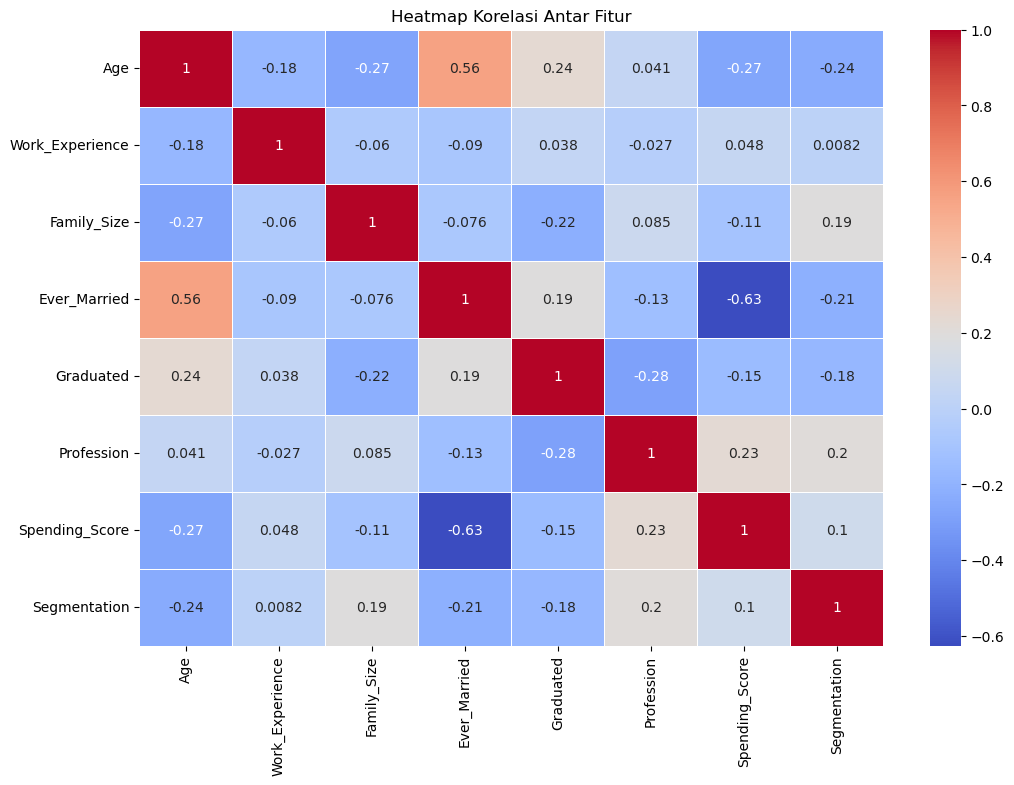

In [23]:
# Heatmap korelasi
selected_features = ['Age', 'Work_Experience', 'Family_Size', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Segmentation']
plt.figure(figsize=(12, 8))
sns.heatmap(data[selected_features].corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

# Analisa Heatmap korelasi antar fitur
1. Hubungan Kuat :
- Age & Ever_Married 0.56. Menunjukan semakin tua seseorang, semakin besar kemungkinan mereka sudah menikah.
- Spending_Score & Ever_Married -0.63. Menunjukan pelanggan yang sudah menikah cenderung memiliki skor penggeluaran lebih rendah. Ini bisa menunjukan perubahan kebiasaan belanja setelah menikah.
2. Hubungan Sedang :
- Segmentation & Age -0.24. Menunjukan usia memiliki pengaruh dalam menentukan segmentasi pelanggan.
- Segmentation & Spending_Score 0.10. Menunjukan spending score sedikit mempengaruhi segmentasi pelanggan, tetapi tidak signifikan.
3. Hubungan dengan korelasi rendah :
- Work_Experience, Profession dan Graduated memiliki korelasi yang sangat kecil terhadap segmentasi pelanggan.

In [24]:
# Mendefinisikan fitur dan target
X = data.drop(columns=['Segmentation'])
y = data['Segmentation']

In [25]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Melatih model Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Melakukan prediksi
y_pred = rf_model.predict(X_test)

In [42]:
# Mengevaluasi model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.37      0.37       391
           1       0.37      0.35      0.36       369
           2       0.50      0.51      0.50       380
           3       0.64      0.67      0.65       474

    accuracy                           0.48      1614
   macro avg       0.47      0.47      0.47      1614
weighted avg       0.48      0.48      0.48      1614



# Evaluasi performa model
- Akurasi 48%. Menunjukan model belum cukup dalam membedakan kelas target.
- Kelas 3 memiliki performa terbaik dengan F1-score 0.65.
- Kelas 1 memiliki performa terburuk dengan F1-score 0.36
- Model cenderung lebih baik dalam mengklasifikasikan kelas 2 dan 3 dibandingkan kelas 0 dan 1.

In [34]:
print(confusion_matrix(y_test, y_pred))

[[143  96  60  92]
 [ 96 128 104  41]
 [ 51  90 195  44]
 [ 89  35  34 316]]


# Diagonal utama (TP - True Positives) menunjukkan jumlah prediksi yang benar untuk setiap kelas:
- Kelas 0: 143 benar
- Kelas 1: 128 benar
- Kelas 2: 195 benar
- Kelas 3: 316 benar
# Kesalahan Klasifikasi (FP & FN)
- Kelas 0 sering diklasifikasikan sebagai kelas 1 dan 3.
- Kelas 1 cenderung diklasifikasikan sebagai kelas 2.
- Kelas 2 memiliki jumlah prediksi yang cukup baik tetapi masih salah diklasifikasikan sebagai kelas 0 dan 1.
- Kelas 3 memiliki klasifikasi terbaik, dengan jumlah kesalahan lebih sedikit dibandingkan kelas lainnya.

In [35]:
print(accuracy_score(y_test, y_pred))

0.48451053283767037


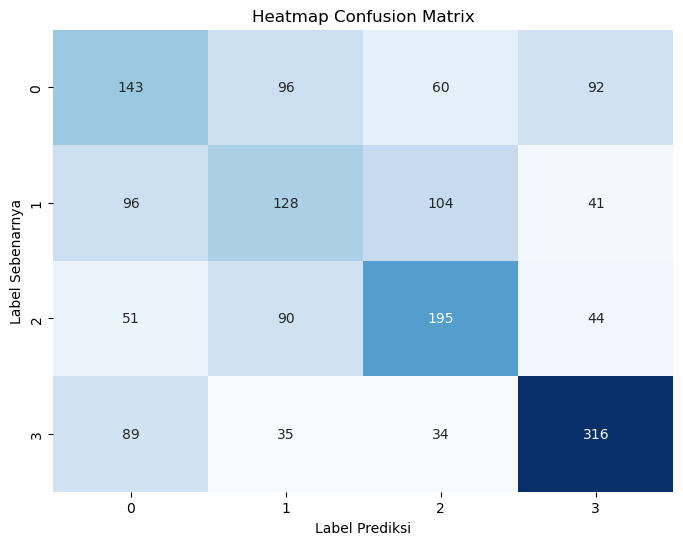

In [40]:
# Visualisasi hasil klasifikasi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.title('Heatmap Confusion Matrix')
plt.show()

# Analisis Heatmap confusion matrix
- Diagonal utama 143,128,195,316 menunjukan jumlah prediksi yang benar untuk setiap kategori.
- Terdapat kesalahan klasifikasi yang terlihat pada kotak non-diagonal :
  - Kelas 0 banyak diklasifikasikan sebagai kelas 1 dan 3.
  - Kelas 1 sering tertukar dengan kelas 2.
  - Kelas 2 cukup sering diklasifikasikan sebagai kelas 0 atau 1.
  - Kelas 3 memiliki klasifikasi terbaik dengan jumlah kesalahan paling sedikit.
- Kelas 3 lebih mudah dikenali dibanding kelas lainnya, terlihat dari angka 316 yang jauh lebih besar di diagonal.
- Kesalahan terbesar terjadi antara kelas 1 dan kelas 2, menunjukkan bahwa fitur yang digunakan mungkin belum cukup kuat untuk membedakan keduanya.

In [37]:
# Menentukan pentingnya fitur
feature_importances = pd.DataFrame({'Fitur': X.columns, 'Pentingnya': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Pentingnya', ascending=False)

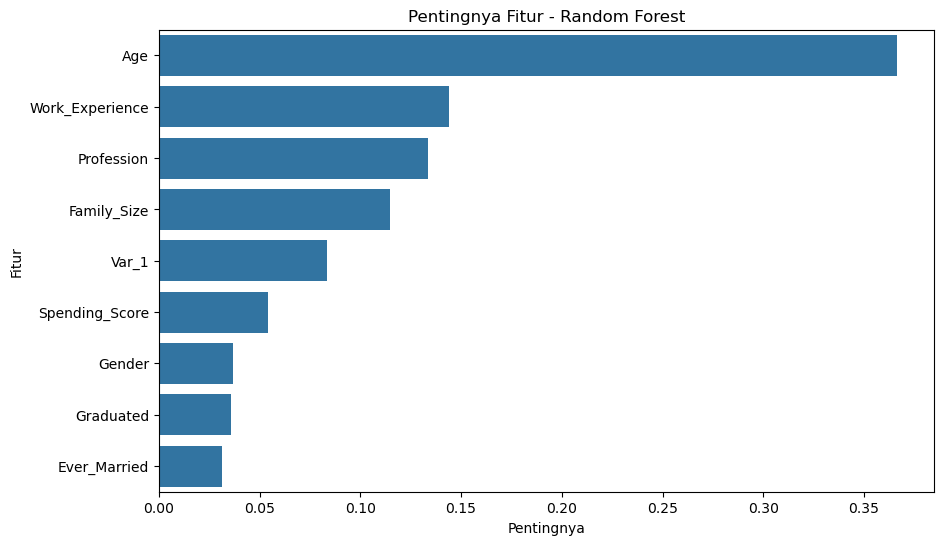

In [39]:
# Plot pentingnya fitur
plt.figure(figsize=(10, 6))
sns.barplot(x='Pentingnya', y='Fitur', data=feature_importances)
plt.title('Pentingnya Fitur - Random Forest')
plt.show()

# Analisis fitur Random Forest
1. Fitur yang Paling Berpengaruh
  - Age (Usia) → Fitur paling dominan dalam menentukan segmen pelanggan.
  - Work_Experience (Pengalaman Kerja) → Semakin tinggi pengalaman kerja, mungkin mempengaruhi pola belanja dan segmen.
  - Profession (Profesi) → Jenis pekerjaan seseorang juga menjadi faktor utama dalam menentukan kategori.
  - Family_Size (Ukuran Keluarga) → Jumlah anggota keluarga bisa memengaruhi pengeluaran dan preferensi segmen.
2. Fitur dengan Pengaruh Lebih Rendah
  - Ever_Married (Status Pernikahan) → Tampaknya tidak terlalu signifikan dibanding fitur lain.
  - Graduated (Pendidikan) → Meskipun berpengaruh, efeknya lebih kecil dibanding fitur lain.
  - Gender (Jenis Kelamin) → Tidak terlalu berdampak besar pada segmentasi pelanggan.